In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/tuethomsen28/Google Drev/SocialDataVizz/Fase1_Plots_kode'

In [3]:
sel_mun = ["Albertslund","Ballerup","Brøndby","Dragør","Frederiksberg","Gentofte","Gladsaxe",
                           "Glostrup","Herlev","Hvidovre","Høje-Taastrup","Ishøj","København",
                           "Rødovre","Tårnby","Vallensbæk"]

In [4]:
path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Data'

df = pd.read_csv(os.path.join(path,'Hast_dagsbaseret_kommune.csv'),
                 encoding='ISO8859-1',sep=";",engine="python",decimal=",")

df = df.rename(columns={"Unnamed: 0":"Kommune","Hastighed observeret, netto (km/t)":"Hast",
                        "Rækkenavne":"Date"})

#df = df.set_index("Kommune")

In [5]:
df

,Kommune,Date,Hast
0,NaN,01-02-2020,86.67618581
1,Lyngby - Taarbæk,2,#NUM!
2,Lyngby - Taarbæk,3,#NUM!
3,Gladsaxe,6,#NUM!
4,Gladsaxe,8,#NUM!
...,...,...,...
1002647,#I/T,53650,24.00614139
1002648,#I/T,53653,21.57942857
1002649,#I/T,53654,13.07881711
1002650,#I/T,95683,#NUM!


## Inserting dates for each row

In [6]:
idx = 0
idx_on_dates = []
for i in df.Date:
    if len(str(i)) < 10:
        pass
    else:
        idx_on_dates += [idx]
    
    idx += 1
    
for i in range(len(idx_on_dates)-1):
    idx_start = idx_on_dates[i]+1
    idx_end = idx_on_dates[i+1]
    
    df.Date[idx_start:idx_end] = df.Date[idx_start-1]

    
last_idx = len(df)-1
df = df.drop([last_idx]) #Dropping last column named hovedtal


## Date to timeseries

In [7]:
df.Date = pd.to_datetime(df.Date,format = "%d-%m-%Y")

In [8]:
df

,Kommune,Date,Hast
0,NaN,2020-02-01,86.67618581
1,Lyngby - Taarbæk,2020-02-01,#NUM!
2,Lyngby - Taarbæk,2020-02-01,#NUM!
3,Gladsaxe,2020-02-01,#NUM!
4,Gladsaxe,2020-02-01,#NUM!
...,...,...,...
1002646,#I/T,2020-04-21,19.69867074
1002647,#I/T,2020-04-21,24.00614139
1002648,#I/T,2020-04-21,21.57942857
1002649,#I/T,2020-04-21,13.07881711


## Sort out missing values

In [9]:
df_processed = df[df["Hast"] != "#NUM!"].dropna()
df_processed = df_processed[df_processed.Kommune.isin(sel_mun)]

# Creating Hast to float

In [10]:
df_processed.dtypes

Kommune            object
Date       datetime64[ns]
Hast               object
dtype: object

In [11]:
df_processed.Hast = pd.to_numeric(df_processed.Hast)

In [12]:
df_processed.dtypes

Kommune            object
Date       datetime64[ns]
Hast              float64
dtype: object

## Removing outliers


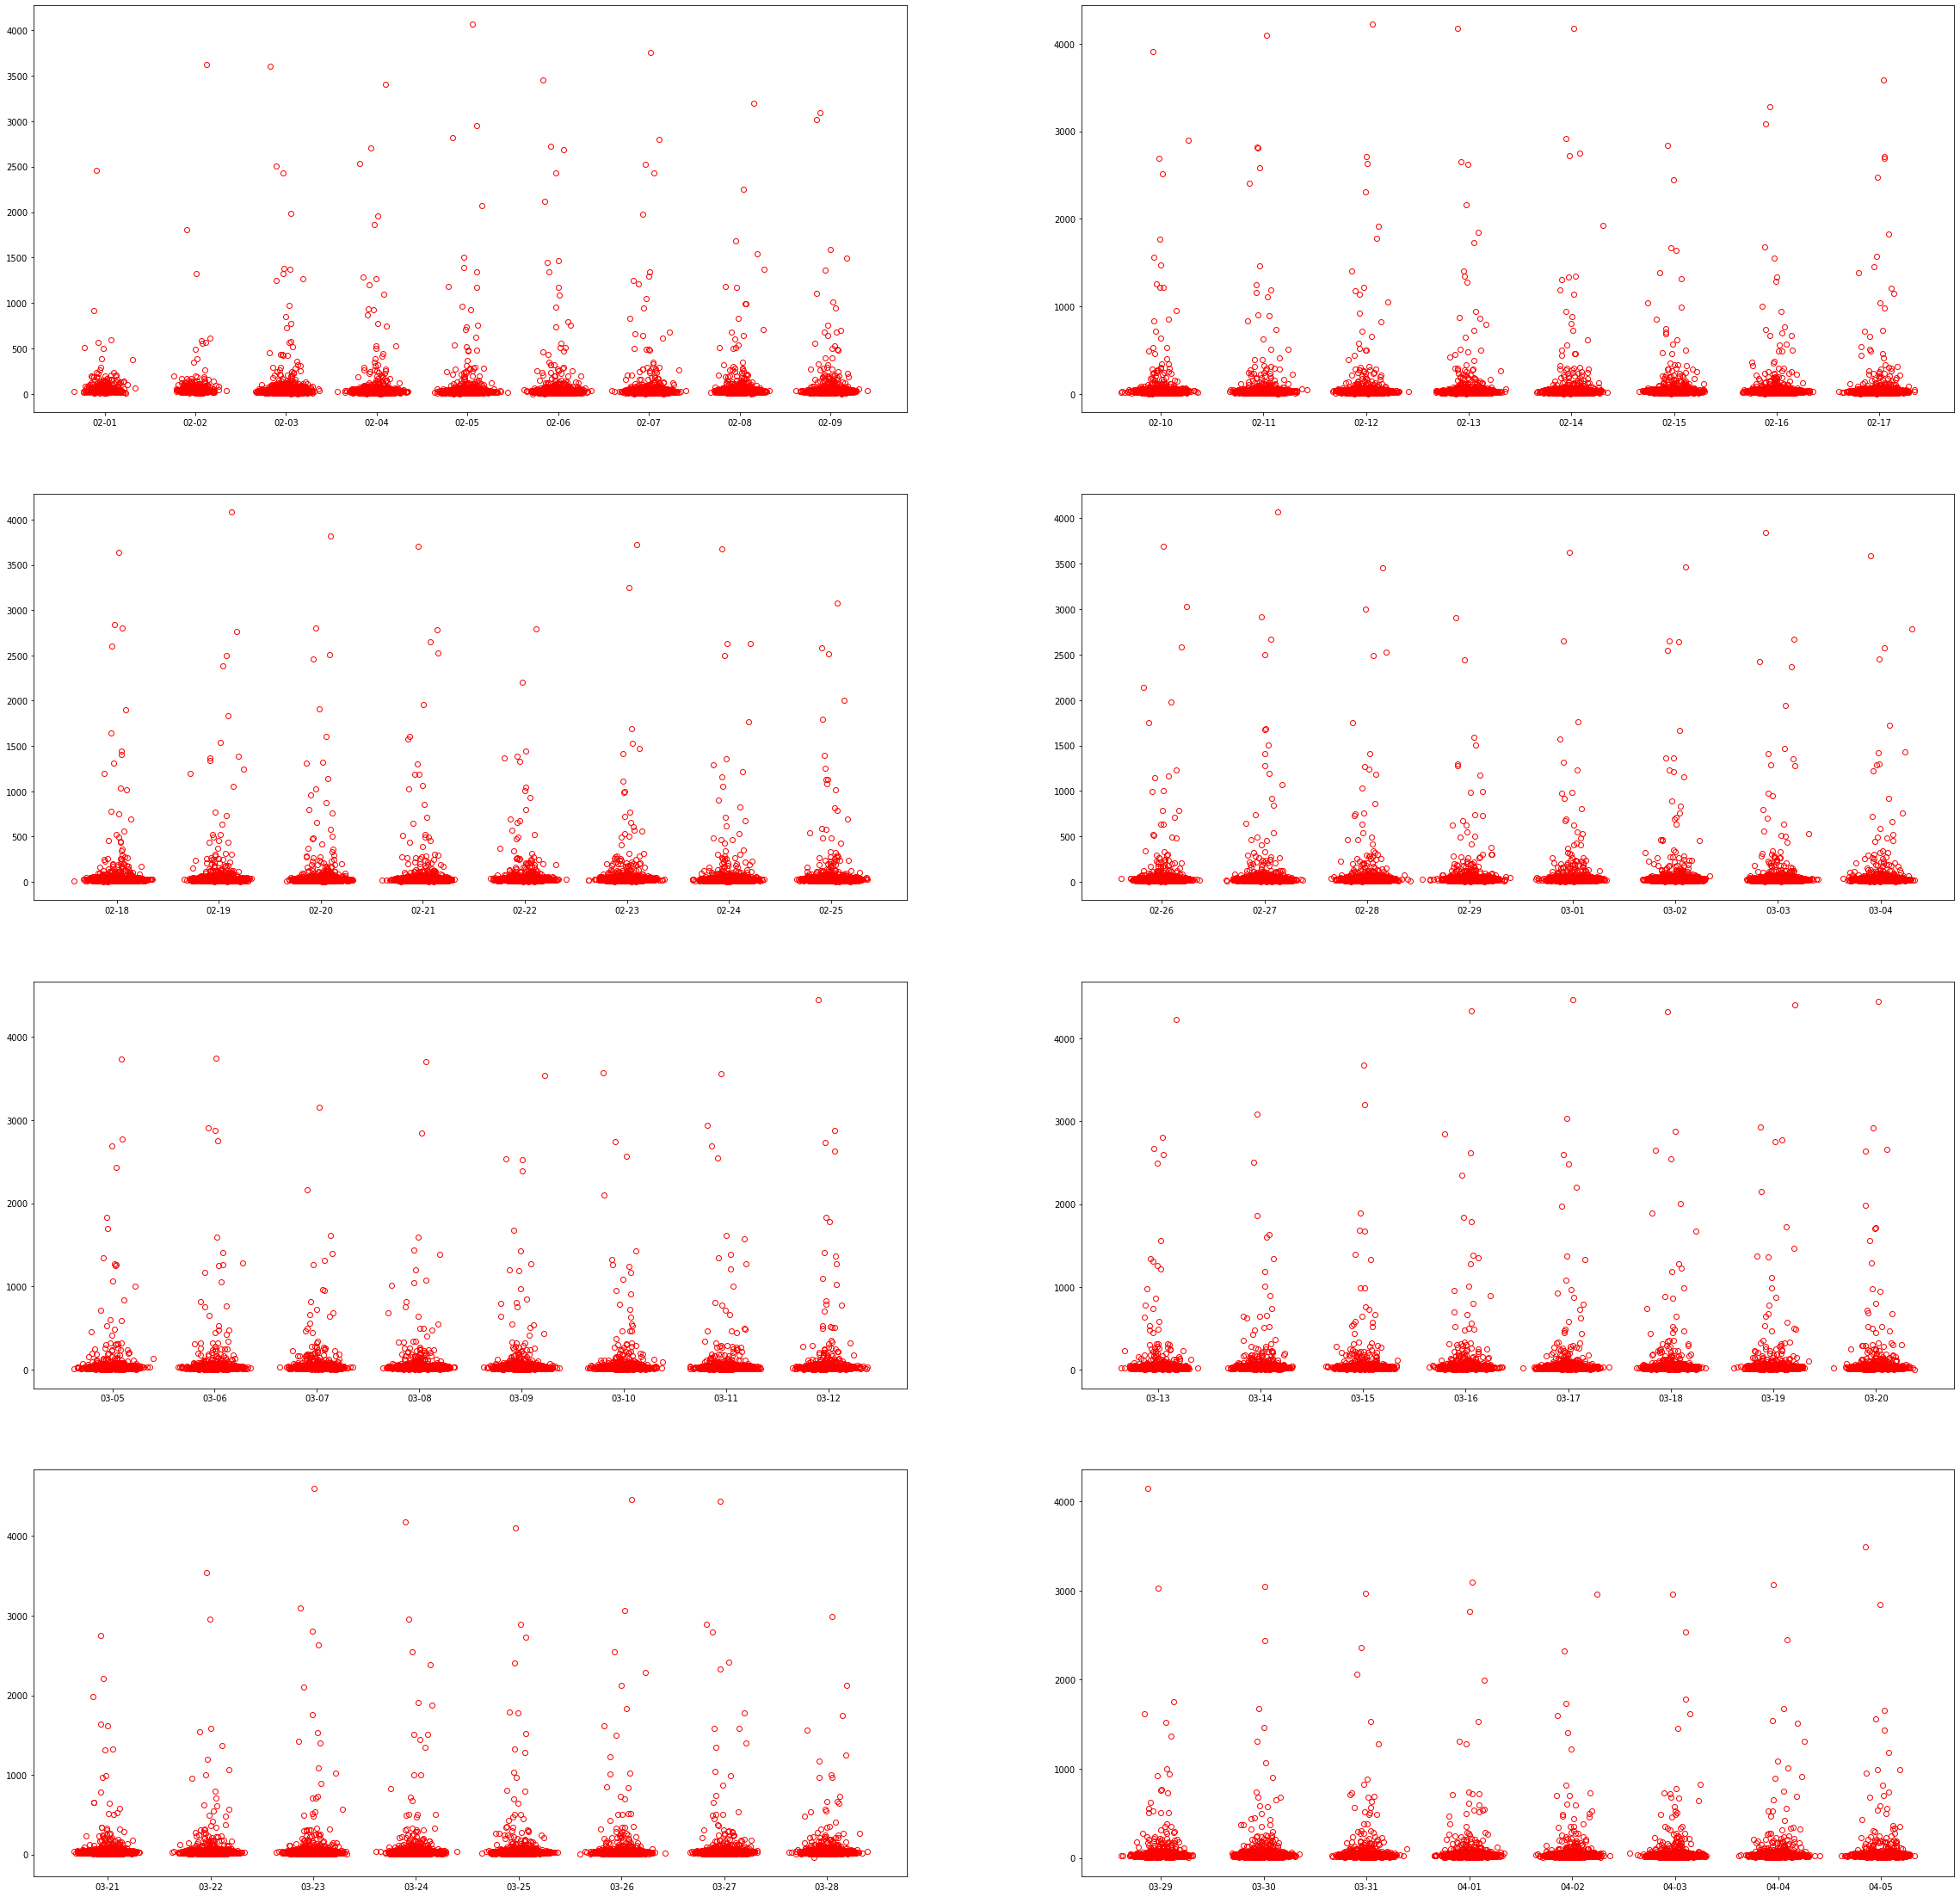

In [13]:
#Creating a range of numbers representing each data
x_range = range(len(df_processed.Date.unique()))
all_dates = df_processed.Date.to_numpy() #getting all the dates to list format
dates = np.unique(all_dates) #get a unique set using set and afterwards convert to list and sort

#Creating a range of numbers representing each data
x_range = range(len(df_processed.Date.unique()))
all_dates = df_processed.Date.to_numpy() #getting all the dates to list format
dates = np.unique(all_dates) #get a unique set using set and afterwards convert to list and sort
#dates = np.sort(dates)

x_axis_dict = dict(zip(dates,x_range)) # Create a dictionary to transform each date to a representing number

x_axis = [x_axis_dict[date] for date in all_dates] # Transform dates to numbers

#This way noise can be added to each x-axis point
length = len(x_axis)
noise = np.random.randn(length,1)*0.1

lst = [[x,y] for x,y in zip(x_axis,df_processed.Hast)]

lst.sort()

jitter = [[lst[i][0] + noise[i],lst[i][1]] for i in range(len(noise))]

fig = plt.figure(figsize=(40,40))

x = np.array([j[0] for j in jitter]).squeeze()
y = np.array([j[1] for j in jitter])

assert len(x) == len(y)

split = int(len(x)/8)

days = [str(day)[5:10] for day in df_processed.Date.unique()]

n,m = 0,split
mini = -0.5
for i in range(8):
    maxi = 8*(i+1)+0.5
    mask = (x < maxi) & (x > mini)
    x_axis = x[mask]
    y_axis = y[mask]
    
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(x_axis,y_axis,'ro',fillstyle='none')
    
    x_max = int(maxi-0.5)+1
    x_min = int(mini+0.5)
    
    ax.set_xticks(range(x_min,x_max))
    ax.set_xticklabels(days[x_min:x_max])
    
    mini = maxi

There is a lot of outliers there simply cant be right. Busses are maximum allowed to drive 80 km/t on motorways and assuming they sometimes drive up to 10 km/t more than they are allowed then all over 90 km/t is removed from the dataset. 

In [14]:
#removing everything over 90 km/t and below 0 is removed. 

df_processed = df_processed[(df_processed.Hast <= 90) & (df_processed.Hast >= 0)]

In [15]:
import matplotlib.pyplot as plt

In [16]:
#Creating a range of numbers representing each data
x_range = range(len(df_processed.Date.unique()))
all_dates = df_processed.Date.to_numpy() #getting all the dates to list format
dates = np.unique(all_dates) #get a unique set using set and afterwards convert to list and sort


In [17]:
#Creating a range of numbers representing each data
x_range = range(len(df_processed.Date.unique()))
all_dates = df_processed.Date.to_numpy() #getting all the dates to list format
dates = np.unique(all_dates) #get a unique set using set and afterwards convert to list and sort
#dates = np.sort(dates)

x_axis_dict = dict(zip(dates,x_range)) # Create a dictionary to transform each date to a representing number

x_axis = [x_axis_dict[date] for date in all_dates] # Transform dates to numbers

#This way noise can be added to each x-axis point
length = len(x_axis)
noise = np.random.randn(length,1)*0.1

lst = [[x,y] for x,y in zip(x_axis,df_processed.Hast)]

lst.sort()

jitter = [[lst[i][0] + noise[i],lst[i][1]] for i in range(len(noise))]

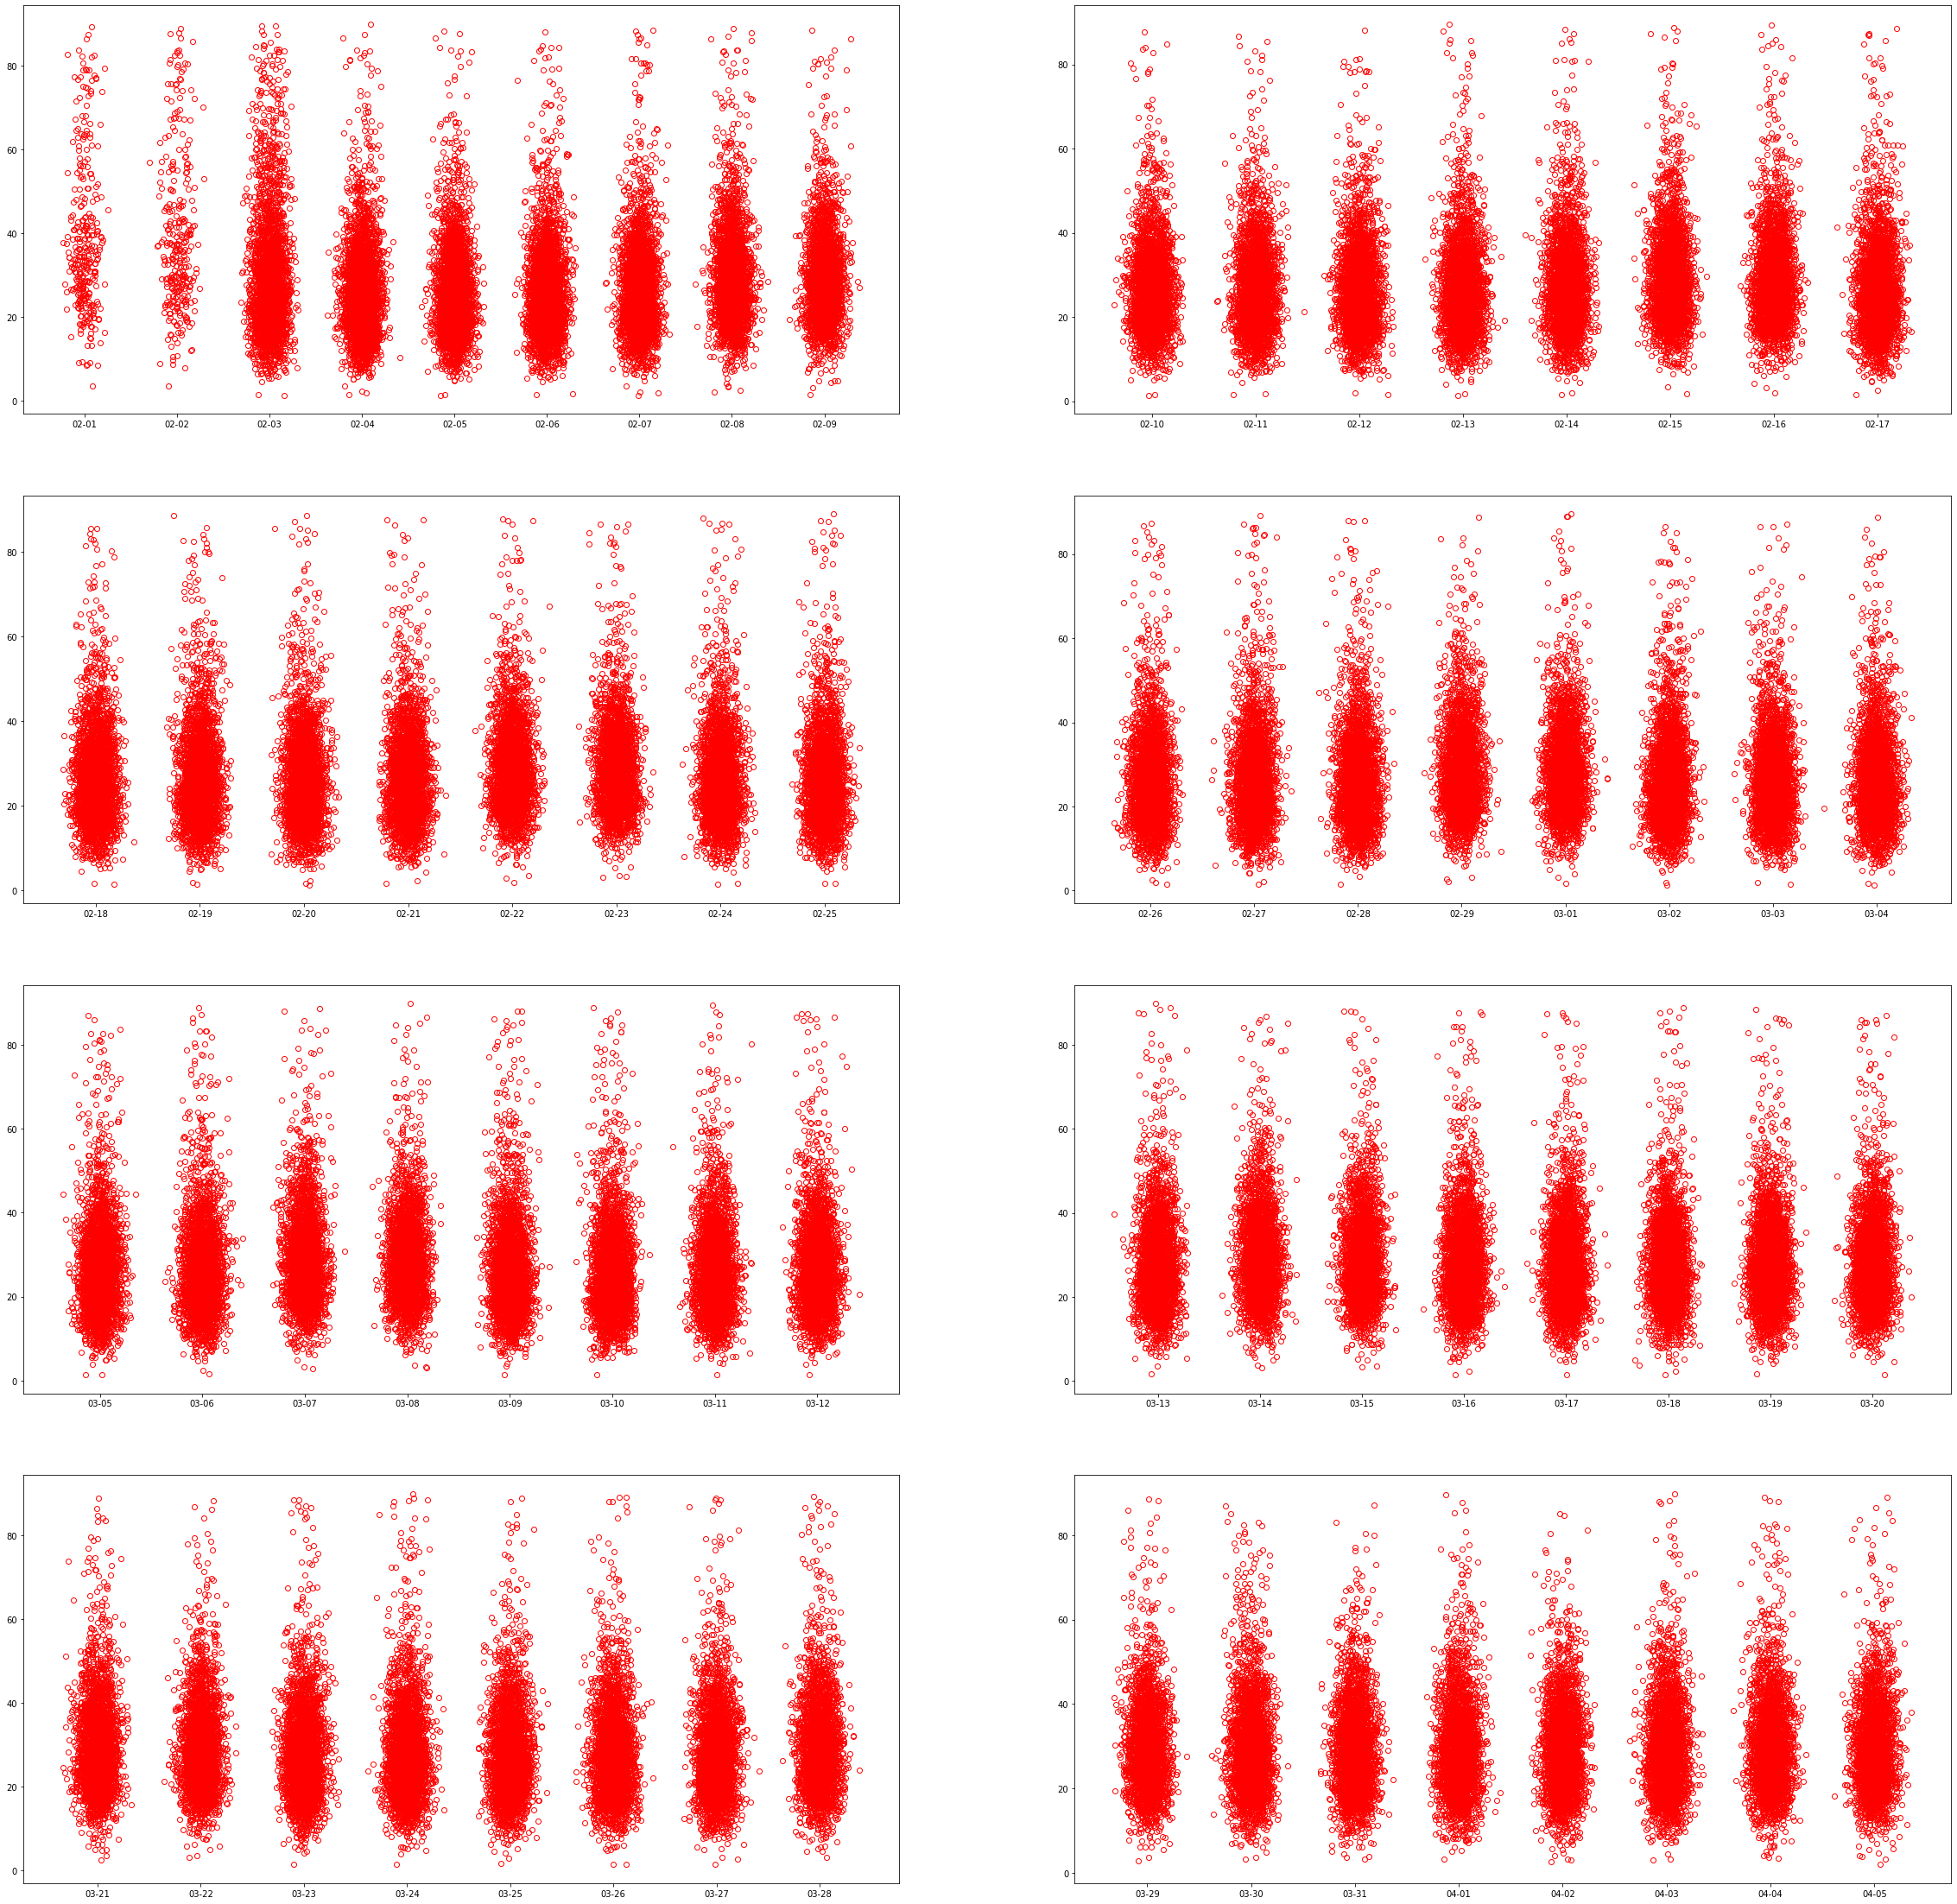

In [18]:
fig = plt.figure(figsize=(40,40))

x = np.array([j[0] for j in jitter]).squeeze()
y = np.array([j[1] for j in jitter])

assert len(x) == len(y)

split = int(len(x)/8)

days = [str(day)[5:10] for day in df_processed.Date.unique()]

n,m = 0,split
mini = -0.5
for i in range(8):
    maxi = 8*(i+1)+0.5
    mask = (x < maxi) & (x > mini)
    x_axis = x[mask]
    y_axis = y[mask]
    
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(x_axis,y_axis,'ro',fillstyle='none')
    
    x_max = int(maxi-0.5)+1
    x_min = int(mini+0.5)
    
    ax.set_xticks(range(x_min,x_max))
    ax.set_xticklabels(days[x_min:x_max])
    
    mini = maxi


#plt.plot(x,y,'ro',fillstyle='none')


## Evt. tilføj histogram over distributioner. Kan være median er bedre en gennemsnit

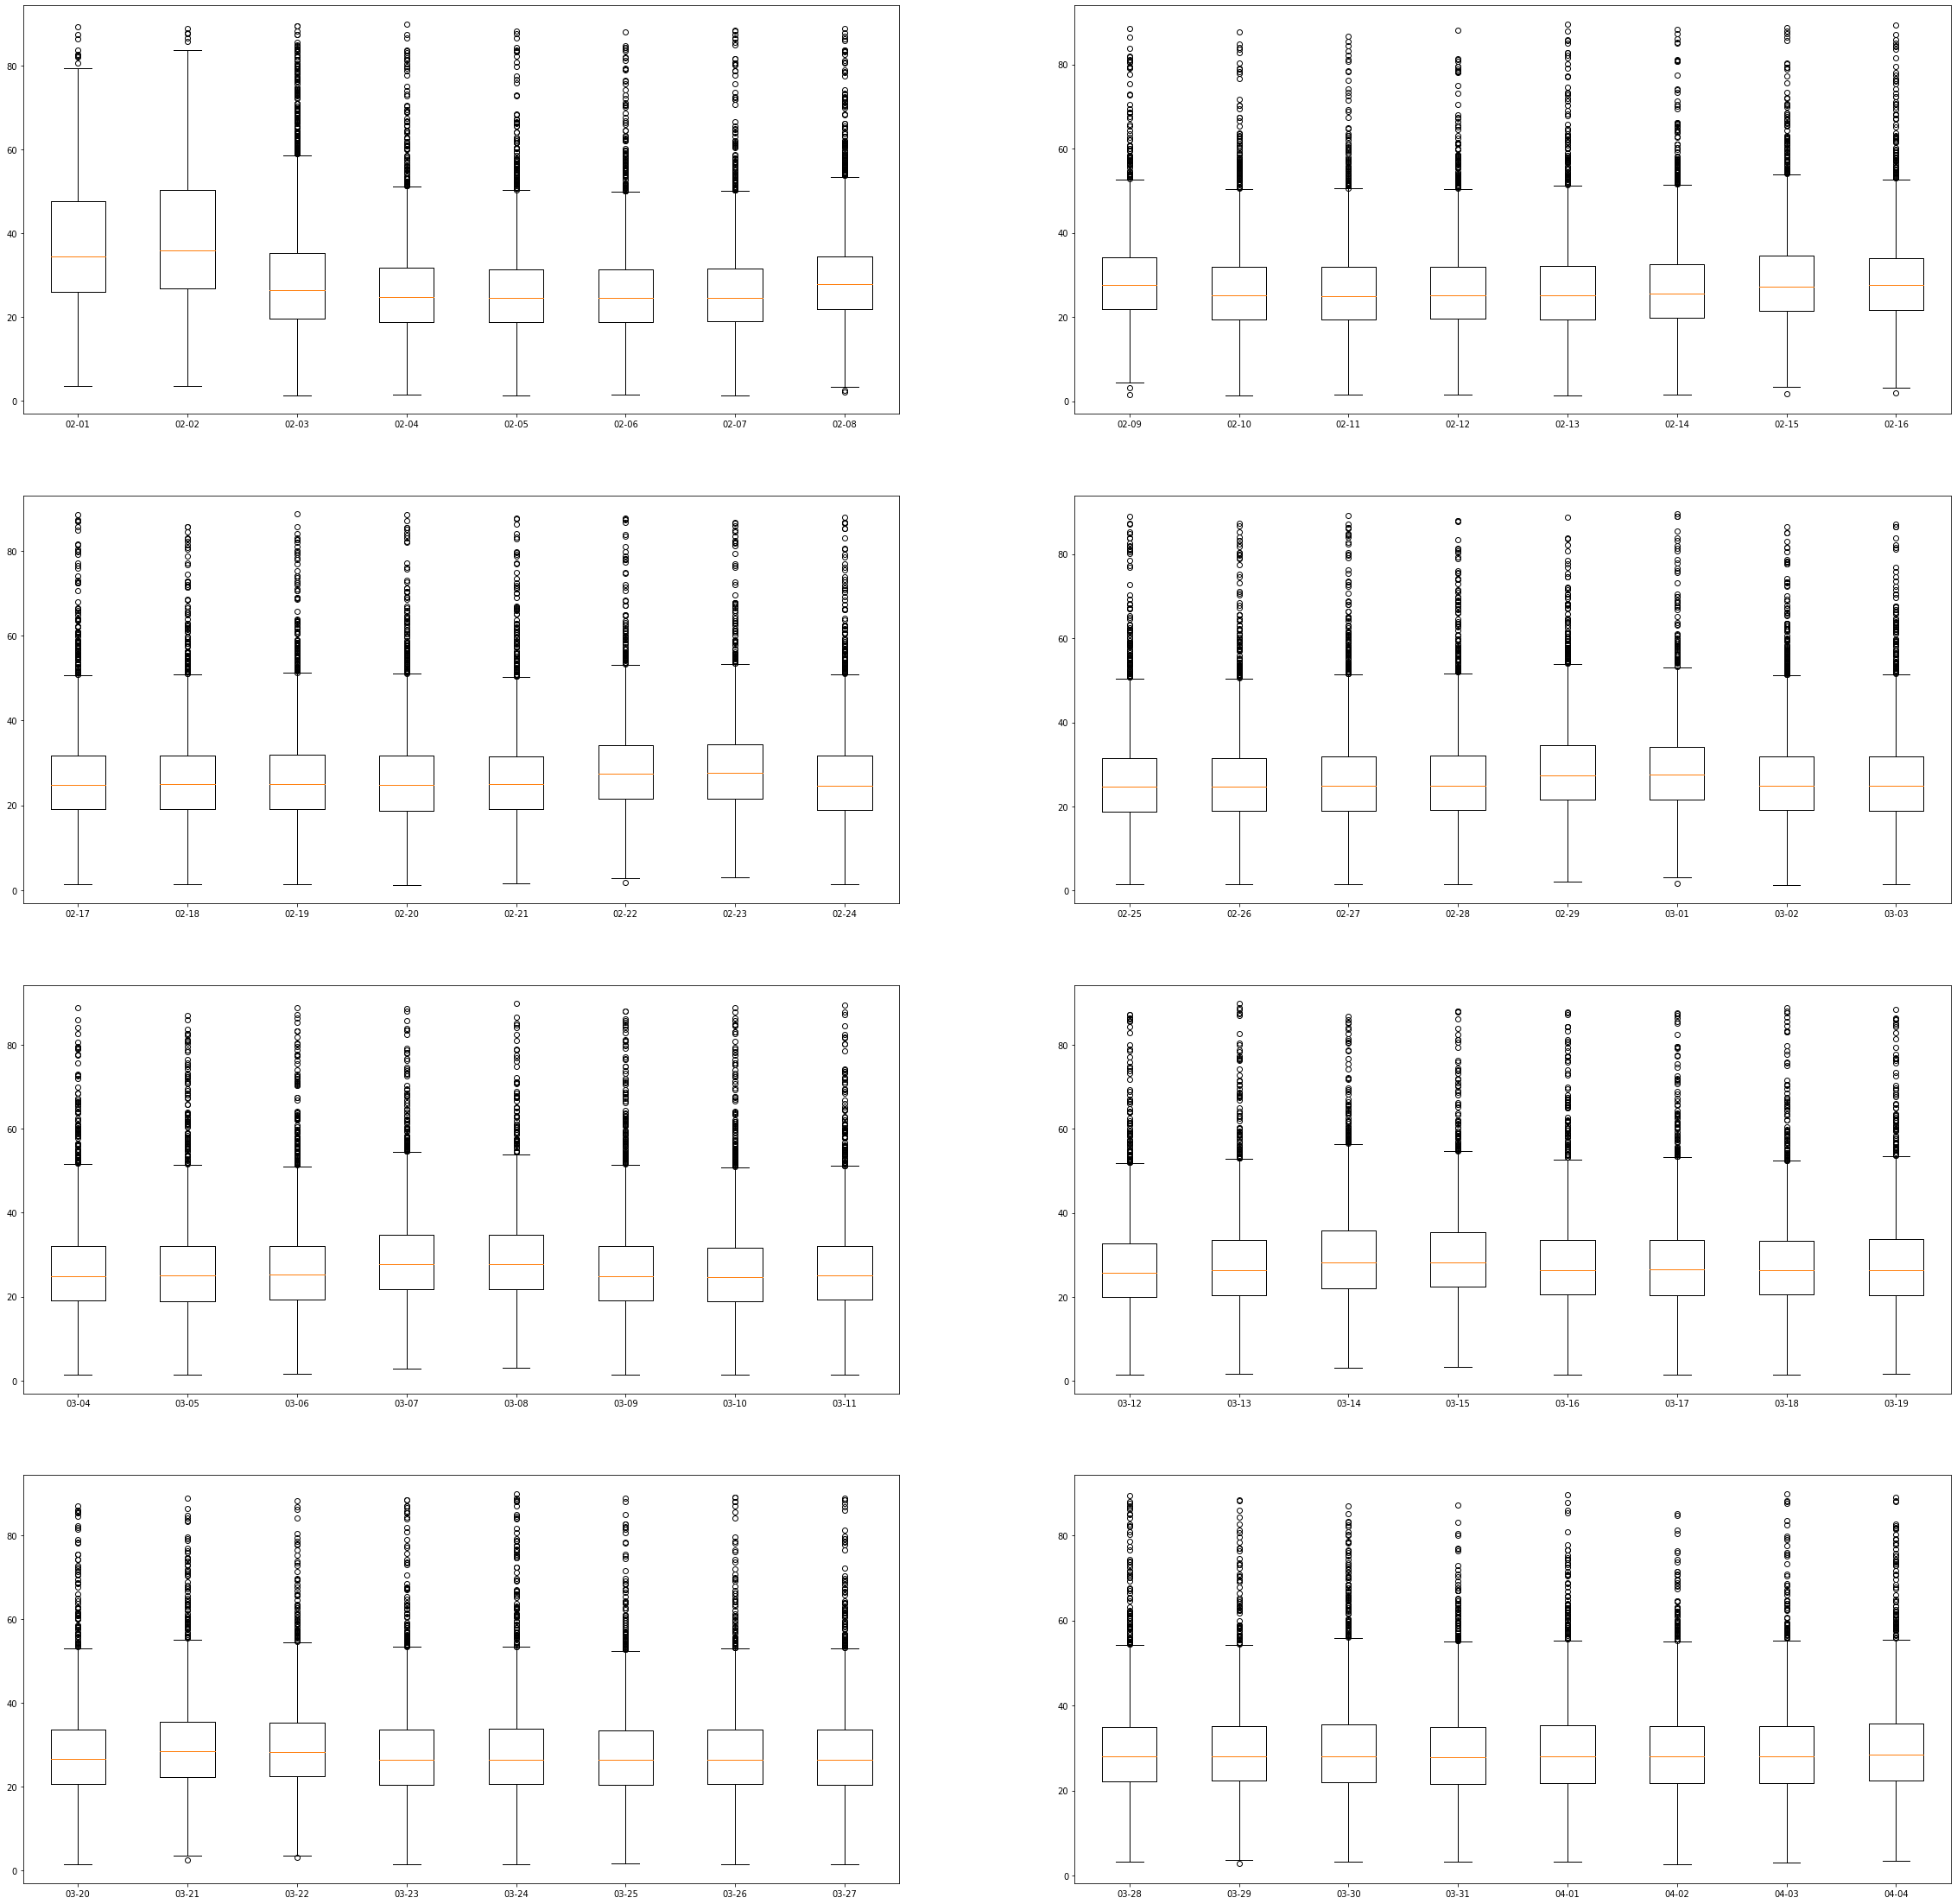

In [19]:
mini = -0.5
boxplot=[]
for i in range(int(max(x_axis))):
    maxi = i + 0.5
    mask = (x < maxi) & (x > mini)
    y_axis = y[mask]
    
    mini = maxi
    
    boxplot += [y_axis]

fig = plt.figure(figsize=(40,40))

mini = 0
for i in range(8):
    maxi = (i+1)*8
    ax = fig.add_subplot(4,2,i+1)
    ax.boxplot(boxplot[mini:maxi])
    
    x_max = int(maxi-0.5)+1
    x_min = int(mini+0.5)
    
    ax.set_xticks(range(1,9))
    ax.set_xticklabels(days[x_min:x_max])
    
    mini = maxi
    

plt.show()

#### Removing first two days because the amount of missing makes the speed appear higher than it is realistic

In [20]:
df_processed = df_processed[df_processed.Date > "2020-02-03"]

# Interactive timeseries plot for all municipalities together

In [24]:
all_speed = df_processed.groupby(["Date"]).mean()

all_speed = all_speed.reset_index()

day_dict = dict(zip(range(8),["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))

day_names = [day_dict[d] for d in all_speed.Date.dt.dayofweek]

all_speed["DayOfWeek"] = day_names

path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Data'

allspeed = pd.read_csv(os.path.join(path,"speedPerDay.csv"),sep=";",index_col=0)

In [25]:
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool, DatetimeTickFormatter, BoxAnnotation, Toggle, Label
from bokeh.transform import dodge
from bokeh.layouts import layout
from matplotlib.pyplot import viridis
import bokeh.palettes
from bokeh.embed import file_html
from bokeh.resources import CDN
output_notebook()

Loading BokehJS ...

In [27]:
all_speed

,Date,Hast,DayOfWeek
0,2020-02-04,26.393124,Tuesday
1,2020-02-05,26.214692,Wednesday
2,2020-02-06,26.171430,Thursday
3,2020-02-07,26.349251,Friday
4,2020-02-08,29.439255,Saturday
...,...,...,...
73,2020-04-17,27.503251,Friday
74,2020-04-18,29.474353,Saturday
75,2020-04-19,29.438071,Sunday
76,2020-04-20,27.394695,Monday


In [26]:
source = ColumnDataSource(all_speed)

p = figure(plot_width=775, plot_height=300, x_axis_type="datetime",toolbar_location=None,
          y_range=(25,32)
          )
p.title.text = 'Avg. speed per day in Copenhagen'

color = bokeh.palettes.Category20[3]

legend_it = []

r = p.line("Date",
           "Hast",
           line_width=2,
           color=color[1],
           alpha=0.8,
           muted_color=color[1],
           muted_alpha=0.2,
           visible=True,
           source=source)

p.yaxis.axis_label = 'Speed in km/t'


hover = HoverTool(tooltips=[
    ('Speed: ', '@Hast km/t'),
    ("Date: ", '@Date{%d-%m}'),
    ("Day: ",'@DayOfWeek')],
    formatters = {'@Date':'datetime'},
    renderers=[r],
    mode="vline")

p.add_tools(hover)

lockdown1_start = pd.to_datetime('20200313')
lockdown1_end = pd.to_datetime('20200318')

lockdown2_start = pd.to_datetime('20200318')
lockdown2_end = pd.to_datetime('20200415')

easter_start = pd.to_datetime('20200404')
easter_end = pd.to_datetime('20200412')

reopening_start = pd.to_datetime('20200415')
reopening_end = pd.to_datetime('20200421')


lockdown1 = BoxAnnotation(left=lockdown1_start, right=lockdown1_end, 
                          fill_color='red', fill_alpha=0.1,visible=True)
lockdown2 = BoxAnnotation(left=lockdown2_start, right=lockdown2_end, 
                           fill_color='red', fill_alpha=0.2,visible=True)

easter = BoxAnnotation(left=easter_start, right=easter_end, 
                       fill_color='yellow', fill_alpha=0.2,visible=True)

reopening = BoxAnnotation(left=reopening_start, right=reopening_end, 
                       fill_color='green', fill_alpha=0.1,visible=True)

p.add_layout(lockdown1)
p.add_layout(lockdown2)
p.add_layout(easter)
p.add_layout(reopening)

#toggle1 = Toggle(label="Lockdown vol. 1", button_type="success", active=True)
#toggle1.js_link('active', lockdown1, 'visible')

#toggle2 = Toggle(label="Lockdown vol. 2", button_type="success", active=True)
#toggle2.js_link('active', lockdown2, 'visible')

#toggle3 = Toggle(label="Easter Break",button_type="success",active=True)
#toggle3.js_link('active', easter, 'visible')

#toggle4 = Toggle(label="Denmarks start reopening",button_type="success",active=True)
#toggle4.js_link('active', reopening, 'visible')

#show(layout([p], [toggle1,toggle2,toggle4]))

lockdown1_cit = Label(x=250, y=230, x_units='screen', y_units='screen',
                 text='First step of lockdown', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

lockdown2_cit = Label(x=277, y=210, x_units='screen', y_units='screen',
                 text='Second step of lockdown', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

easter_cit = Label(x=483, y=230, x_units='screen', y_units='screen',
                 text='Easter Break', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

opening_cit = Label(x=600, y=230, x_units='screen', y_units='screen',
                 text='Opening', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')


p.add_layout(lockdown1_cit)
p.add_layout(lockdown2_cit)
p.add_layout(easter_cit)
p.add_layout(opening_cit)

show(p)



#output_file("interactive_legend.html", title="interactive_legend.py example")

https://docs.bokeh.org/en/latest/docs/user_guide/styling.html

# Timeseries plot for each municipality

In [ ]:
allMuns = df_processed.groupby(["Kommune","Date"]).mean()
allMuns = allMuns.unstack()['Hast'].transpose()

allMuns = allMuns.reset_index()

day_dict = dict(zip(range(8),["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))

day_names = [day_dict[d] for d in all_speed.Date.dt.dayofweek]

allMuns["DayOfWeek"] = day_names

allMuns.sample(5)

In [ ]:
source = ColumnDataSource(allMuns)
p = figure(plot_width=1000, plot_height=450, x_axis_type="datetime",toolbar_location=None)
p.title.text = 'Avg. speed per day for municipalities in the Urban Area of Copenhagen'

colors = bokeh.palettes.Category20[len(sel_mun)]

renderers = [0]*(len(sel_mun))
legend_it = []
                 
for name, color, idx in zip(sel_mun,colors,range(len(sel_mun))):
    renderers[idx] = p.line("Date",
                           name,
                           line_width=2,
                           color=color,
                           alpha=0.8,
                           muted_color=color,
                           muted_alpha=0.2,
                           visible=False,
                           source=source)
    legend_it.append((name, [renderers[idx]]))
    
legend = Legend(items=legend_it, location=(0, -5))
legend.click_policy="hide"
legend.title = 'To see a graph click on the municipality below'

p.add_layout(legend, 'right')
p.yaxis.axis_label = 'Avg. speed in km/t'

for kommune,r in zip(sel_mun,renderers):
    hover = HoverTool(tooltips=[
    ("Name: ", kommune),
    ('Speed: ', '@{%s} km/t' %kommune),
    ("Date: ", '@Date{%d-%m}'),
    ("Day: ",'@DayOfWeek')],
        formatters = {'@Date':'datetime'},
        renderers=[r],
        mode="vline")
    p.add_tools(hover)
    
lockdown1_start = pd.to_datetime('20200313')
lockdown1_end = pd.to_datetime('20200318')

lockdown2_start = pd.to_datetime('20200318')
lockdown2_end = pd.to_datetime('20200415')

easter_start = pd.to_datetime('20200404')
easter_end = pd.to_datetime('20200412')

reopening_start = pd.to_datetime('20200415')
reopening_end = pd.to_datetime('20200421')


lockdown1 = BoxAnnotation(left=lockdown1_start, right=lockdown1_end, 
                          fill_color='red', fill_alpha=0.1,visible=True)
lockdown2 = BoxAnnotation(left=lockdown2_start, right=lockdown2_end, 
                           fill_color='red', fill_alpha=0.2,visible=True)

easter = BoxAnnotation(left=easter_start, right=easter_end, 
                       fill_color='yellow', fill_alpha=0.2,visible=True)

reopening = BoxAnnotation(left=reopening_start, right=reopening_end, 
                       fill_color='green', fill_alpha=0.1,visible=True)

p.add_layout(lockdown1)
p.add_layout(lockdown2)
p.add_layout(easter)
p.add_layout(reopening)

lockdown1_cit = Label(x=216, y=370, x_units='screen', y_units='screen',
                 text='First step of lockdown', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

lockdown2_cit = Label(x=236, y=350, x_units='screen', y_units='screen',
                 text='Second step of lockdown', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

easter_cit = Label(x=426, y=370, x_units='screen', y_units='screen',
                 text='Easter Break', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

opening_cit = Label(x=534, y=370, x_units='screen', y_units='screen',
                 text='Opening', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')


p.add_layout(lockdown1_cit)
p.add_layout(lockdown2_cit)
p.add_layout(easter_cit)
p.add_layout(opening_cit)


show(p)

output = output_file("interactive_legend.html", title="interactive_legend.py example")

In [ ]:
html = file_html(p,CDN,"Speed vs. Time per municipality")

# Saving avg. speed per day for each municipality for choropleth map

In [ ]:
allMuns.to_csv(os.path.join(path,"speedPerMun.csv"),encoding="utf-8",sep=";",index=False)